# A Neuron 

First we will cd into the "Neuron" folder where the required header folders and the main files are situated 

In [1]:
cd Neuron

/media/arun/Data/arun_files/thesis_files/neru2019/theta_gates_reliable_sequences_mEC/Neuron


In [2]:
ls

bins/  configure_files/  main_files/  scripts/


Compile the files to generate the binaries


## Generate the noise header file

### run scripts/write_noise.py seed numberOfNeurons


In [19]:
run scripts/write_noise.py 0 1

### A noise.hpp file with the specified seed instantiating a random number generator is produced

In [22]:
cat noise.hpp

#pragma once
#include "insilico/core/engine.hpp"
#include <cmath>
#include<random>
#include<vector>

namespace insilico { namespace noise {

std::mt19937_64 gen(0);
std::normal_distribution<double> dist(0,1);
std::vector<double> randomize(1);
double inject(unsigned index)
 {
	randomize[index]= dist(gen);
	return randomize[index];

}
} } // insilico


### Compile the header files with g++, compiler flags, etc

In [29]:
import os
os.system("g++ -O3 -Ofast -std=c++11 -I../insilico-0.25/include -o bins/insilico_Neuron_0trial.out main_files/main_Neuron.cpp")

0

### Check that the insilico_Neuron_0trial.out is generted in the bins directory

In [28]:
ls bins/

insilico_Neuron_0trial.out*


### Generate the helper files with parameters for the neuron (Ion channel, applied current, etc)

In [94]:
run scripts/gen_nsets_Neuron.py

configure_files/nsets_Neuron_-2.8i2i.isf
configure_files/nsets_Neuron_-2.75i2i.isf
configure_files/nsets_Neuron_-2.7i2i.isf
configure_files/nsets_Neuron_-2.65i2i.isf
configure_files/nsets_Neuron_-2.6i2i.isf
5


### Time to run the simulation. We will store the result in the output file named "output_Neuron.dat" in the folder dir_output

In [95]:
outputFN = "dir_output/output_Neuron.dat"
nsetFN = "configure_files/nsets_Neuron_-2.7i2i.isf"
dparams = dict()
dparams['outputFN'] = outputFN
dparams['nsetFN'] = nsetFN

### Fllow the insilico convention for running a simulation "bin -o outputFileName  -n nsetFileName"

In [96]:
os.system("./bins/insilico_Neuron_0trial.out -o {p[outputFN]} -n {p[nsetFN]}".format(p=dparams))

0

### Verify that the output is generated in the folder dir_output

In [97]:
ls dir_output

output_Neuron_0.1i2i.dat  output_Neuron_0.3i2i.dat  output_Neuron_0.5i2i.dat
output_Neuron_0.2i2i.dat  output_Neuron_0.4i2i.dat  output_Neuron.dat


### Analysing the output

In [98]:
import matplotlib.pyplot as plt
import numpy as np

In [99]:
data = np.loadtxt("dir_output/output_Neuron.dat",delimiter=',',comments='time')

In [100]:
data.shape

(100000, 2)

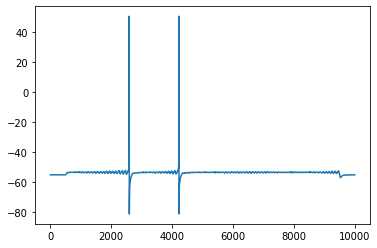

In [101]:
plt.plot(data[:,0], data[:,1])

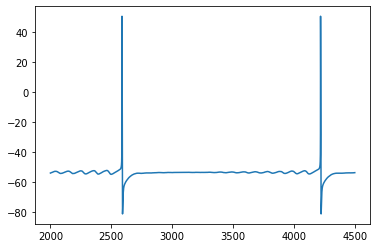

In [102]:
plt.plot(data[20000:45000,0], data[20000:45000,1])

### Automating the workflow (More or less)

### Refactoring the code into a function


In [67]:
def run_Once(d_params):
    ### d_params is passed as an argument to this function
    outputFN = "dir_output/output_Neuron_{p[i2i]}i2i.dat".format(p=d_params)
    nsetFN = "configure_files/nsets_Neuron_{p[i2i]}i2i.isf".format(p=d_params)
    dparams['outputFN'] = outputFN
    dparams['nsetFN'] = nsetFN
    os.system("./bins/insilico_Neuron_0trial.out -o {p[outputFN]} -n {p[nsetFN]} ".format(p=dparams))

In [103]:
import time
st_t = time.time()

cnt = 0
l_i2is = [-2.8,-2.75,-2.7,-2.65,-2.6]

l_dparams = []

for i2i in l_i2is:
    l_dparams.append({'i2i':str(i2i)})
    cnt += 1

print(cnt)

for d_params in l_dparams:
    run_Once(d_params)
end_t = time.time()
print("It took ", (end_t - st_t )/60.0 ," minutes to run the entire set of simulations!!")


5
It took  1.4643149733543397  minutes to run the entire set of simulations!!


dir_output/output_Neuron_-2.8i2i.dat
dir_output/output_Neuron_-2.75i2i.dat
dir_output/output_Neuron_-2.7i2i.dat
dir_output/output_Neuron_-2.65i2i.dat
dir_output/output_Neuron_-2.6i2i.dat


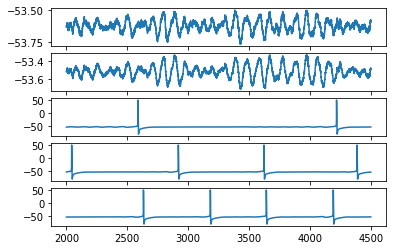

In [105]:
fig,axs = plt.subplots(len(l_i2is),1)
for ind,i2i in enumerate(l_i2is):
    outputFN = "dir_output/output_Neuron_{}i2i.dat".format(str(i2i))
    print(outputFN)
    data = np.loadtxt(outputFN, delimiter=',', comments='time')
    axs[ind].plot(data[20000:45000,0],data[20000:45000,1])
